In [2]:
import os
import urllib
import tarfile

In [3]:
pip install pandas matplotlib numpy scikit-learn scipy joblib

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
FILE_PATH = os.path.join("datasets", "housing")
FILE_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
TGZ_NAME = "housing.tgz"

In [6]:
def fetch_data(file_url, file_path, file_name):
    os.makedirs(file_path, exist_ok=True)
    tgz_path = os.path.join(file_path, file_name)
    urllib.request.urlretrieve(file_url, tgz_path)
    file_tgz = tarfile.open(tgz_path)
    file_tgz.extractall(path=file_path)
    file_tgz.close()

In [7]:
fetch_data(FILE_URL, FILE_PATH, TGZ_NAME)

In [8]:
import pandas as pd

In [9]:
def load_data(file_path, file_name):
    csv_path = os.path.join(file_path, file_name)
    return pd.read_csv(csv_path)

In [10]:
CSV_NAME = "housing.csv"
df = load_data(FILE_PATH, CSV_NAME)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20 640 entries in the df <br>
All except ocean_proximity are type float64 <br>
Total_bedrooms column has only 20 433 non-null rows indicating missing data

In [12]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


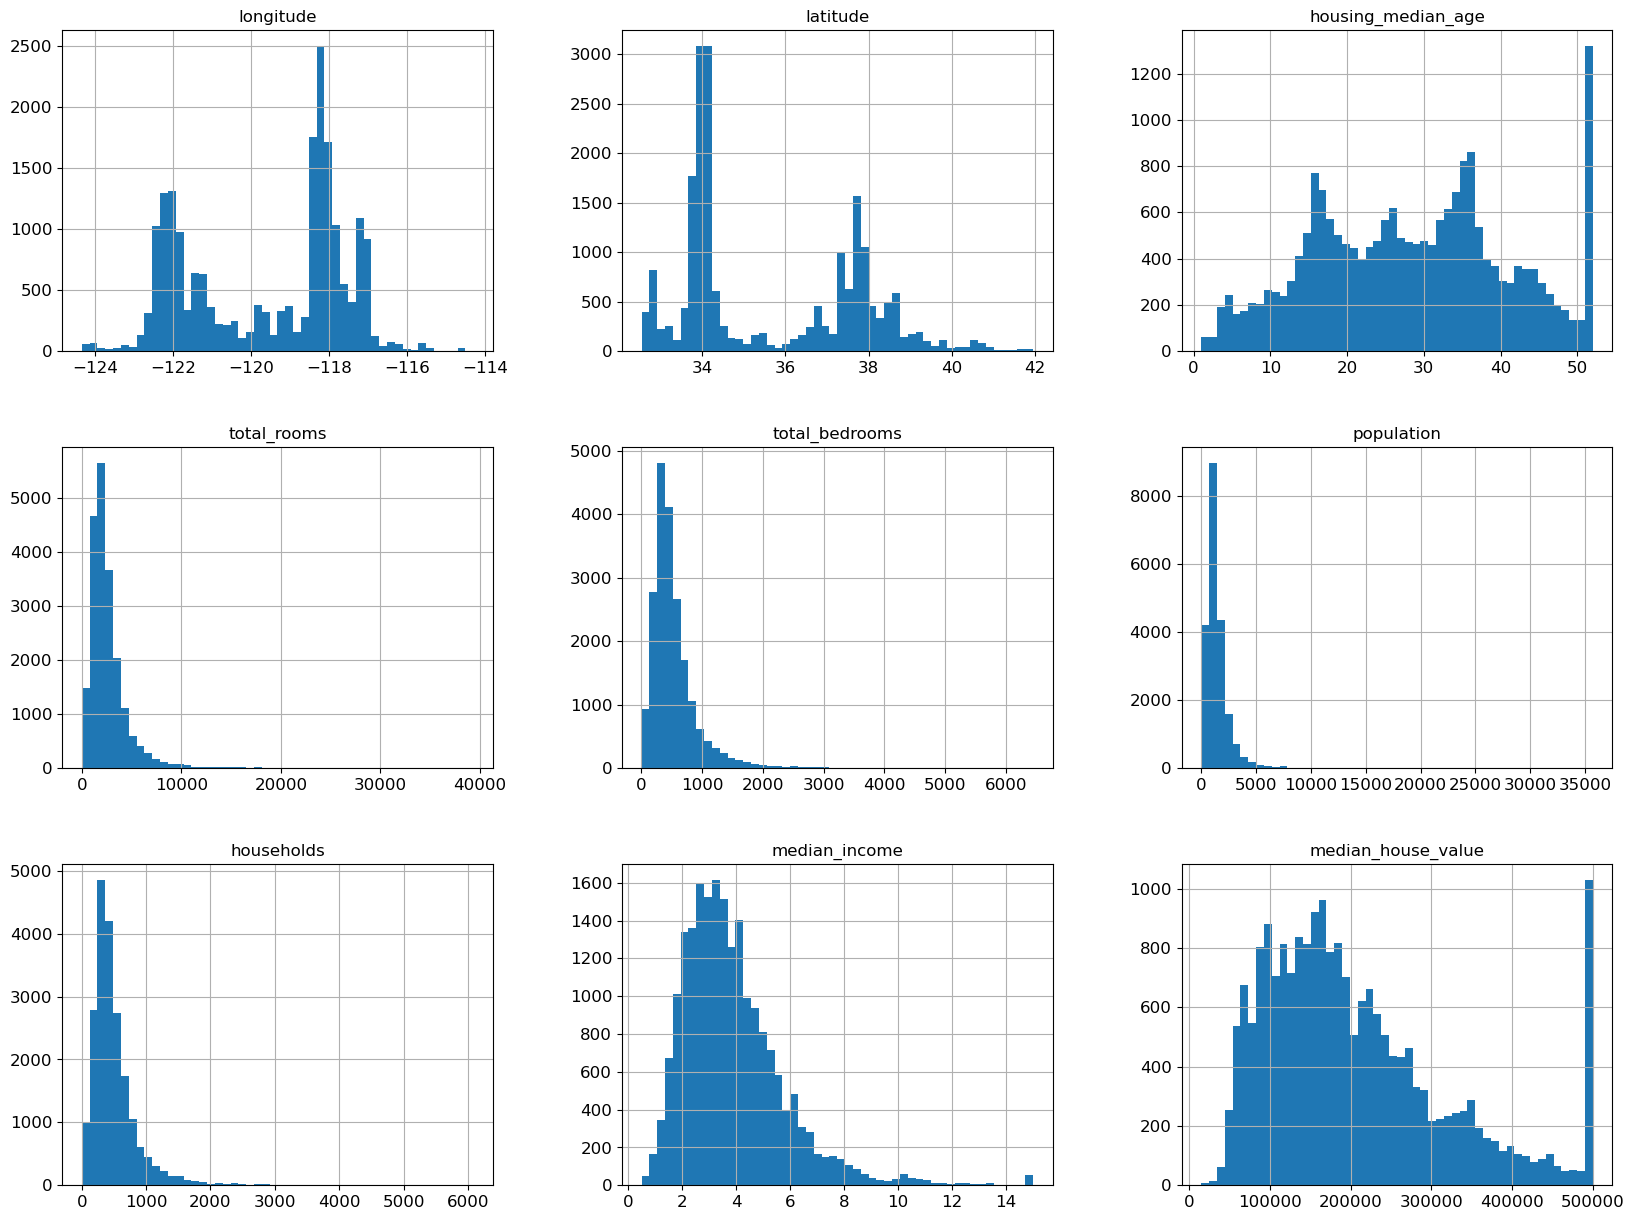

In [14]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

- housing_median and median_house-value are capped
- data has different scales (must be normalised)
- data is tailed heavy (consider transformation)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

In [17]:
import numpy as np

<Axes: >

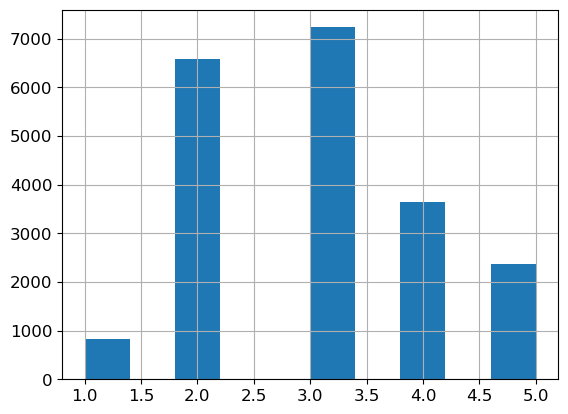

In [18]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df["income_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [22]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,187800.0,<1H OCEAN
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,136600.0,<1H OCEAN
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,400000.0,NEAR BAY
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,106300.0,INLAND
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND


In [24]:
# we can randomly sample just a fraction of df to perform EDA by
# rd_sample = df.random(frac=0.5)

In [25]:
# make a copy of the train set
house_df = df.copy()

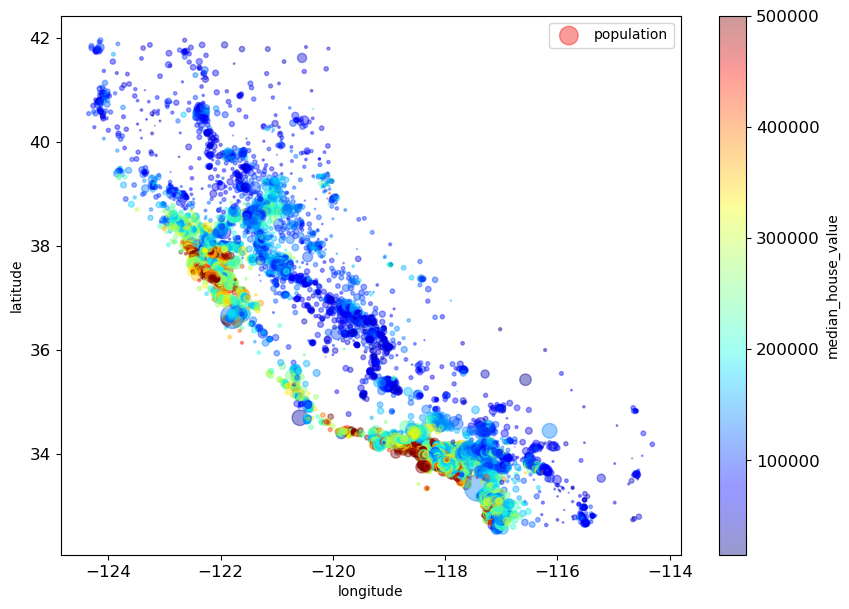

In [26]:
house_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
              s=house_df["population"]/100, label="population", 
              figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), 
              colorbar=True)
plt.legend()

In [27]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end__to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

downloading california.png


('.\\images\\end__to_end_project\\california.png',
 <http.client.HTTPMessage at 0x2dd450f79a0>)

Saving figure california_housing_prices_plot


<function matplotlib.pyplot.show(close=None, block=None)>

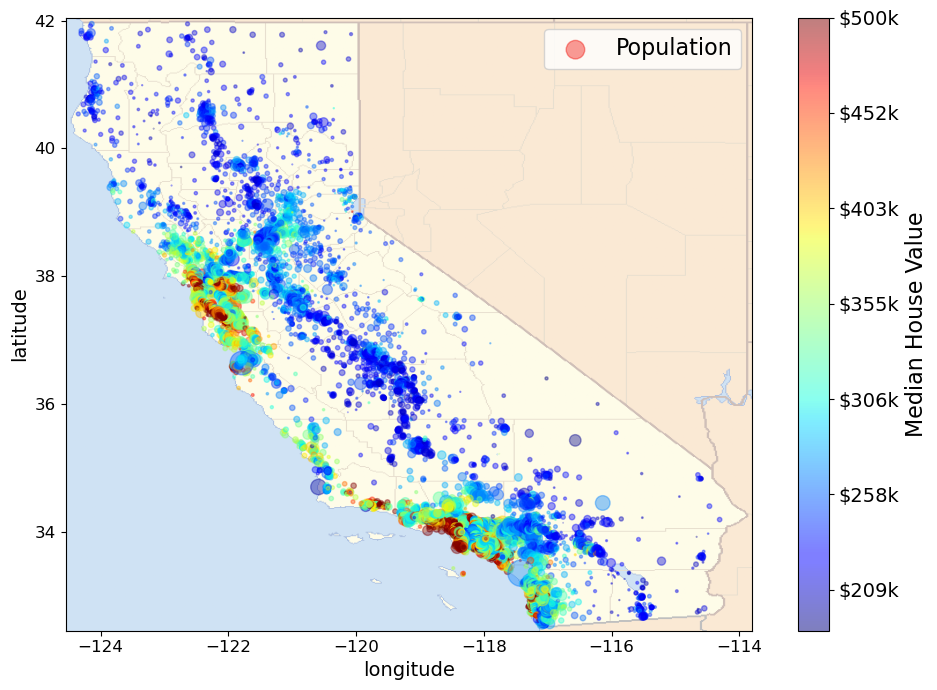

In [28]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax=house_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
               s=house_df["population"]/100, label="Population",
               c="median_house_value", cmap=plt.get_cmap("jet"),
               colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = house_df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")

plt.show

In [29]:
corr_matrix = house_df.corr()

C:\Users\chonl\AppData\Local\Temp\ipykernel_15648\1088165290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house_df.corr()


In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

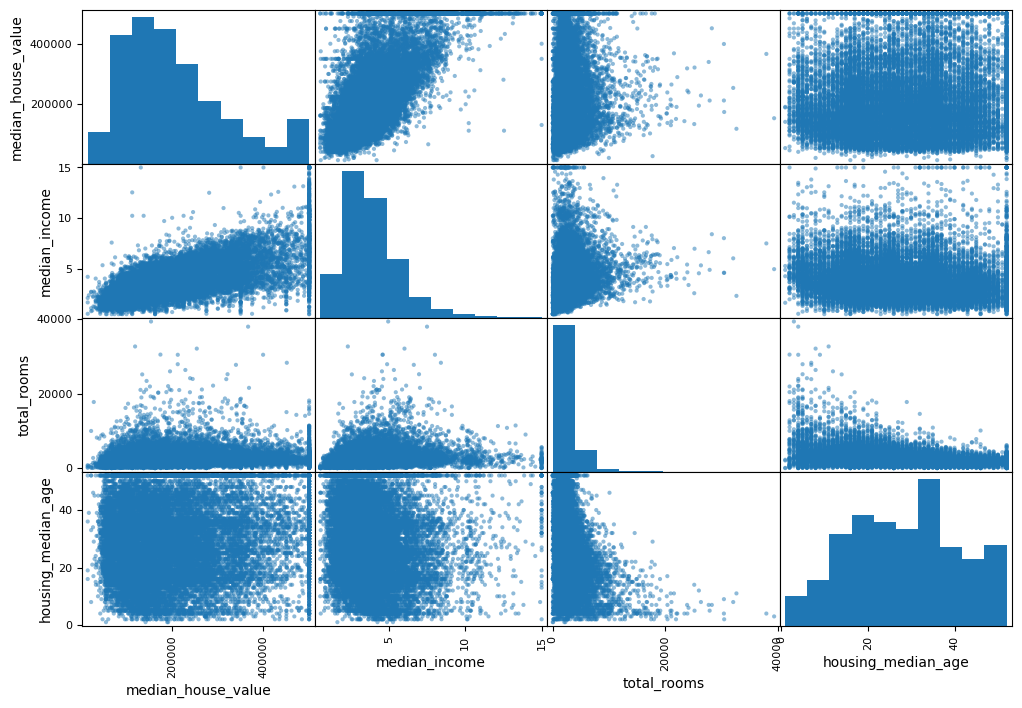

In [31]:
att = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(house_df[att], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

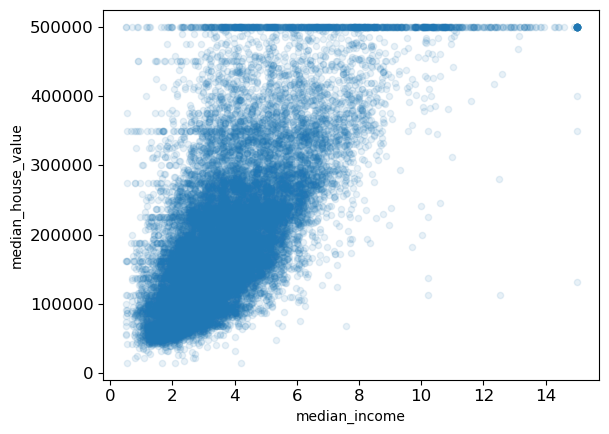

In [32]:
house_df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [33]:
house_df["rooms_per_household"] = house_df["total_rooms"]/house_df["households"]
house_df["bedrooms_per_room"] = house_df["total_bedrooms"]/house_df["total_rooms"]
house_df["pop_per_household"] = house_df["population"]/house_df["households"]

In [34]:
corr_matrix = house_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\chonl\AppData\Local\Temp\ipykernel_15648\3118180113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house_df.corr()


median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
pop_per_household     -0.023737
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

In [35]:
house_df = strat_train_set.drop("median_house_value", axis=1)
house_labels = strat_train_set["median_house_value"].copy()

In [36]:
median = house_df["total_bedrooms"].median()
house_df["total_bedrooms"].fillna(median, inplace=True)

In [37]:
#use function imput from sklearn
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy="median")
house_num = house_df.drop("ocean_proximity", axis=1)
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [39]:
print(imputer.statistics_)
# print(house_num.median().values)

[-118.49     34.25     29.     2129.      436.     1167.      410.
    3.5343]


In [40]:
X = imputer.transform(house_num)
house_tr = pd.DataFrame(X, columns=house_num.columns, index=house_num.index)

In [41]:
house_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885


In [42]:
house_cat = house_df[["ocean_proximity"]]
house_cat.head()

,ocean_proximity
19328,<1H OCEAN
4806,<1H OCEAN
15645,NEAR BAY
2975,INLAND
18823,INLAND


In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinal_encoder = OrdinalEncoder()
house_cat_encoder = ordinal_encoder.fit_transform(house_cat)
house_cat_encoder[:5]

array([[0.],
       [0.],
       [3.],
       [1.],
       [1.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
cat_encoder = OneHotEncoder()
house_cat_1hot = cat_encoder.fit_transform(house_cat)
house_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6
# these are column indices

In [50]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx]/X[:, households_idx]
        population_per_household = X[:, population_idx]/X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx]/X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [51]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
house_extra_attr = attr_adder.transform(house_df.values)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [53]:
num_pl = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attrib_adder', CombinedAttributesAdder()),
    ('minmax_scaler', MinMaxScaler()),
])

house_num_tr = num_pl.fit_transform(house_num)

In [54]:
from sklearn.compose import ColumnTransformer

num_attribs = list(house_num)
cat_attribs = ["ocean_proximity"]

In [55]:
full_pl = ColumnTransformer([
    ("num", num_pl, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

house_prep = full_pl.fit_transform(house_df)

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_prep, house_labels)

LinearRegression()

In [57]:
sample = house_df.iloc[:5]
sample_lb = house_labels.iloc[:5]
sample_df_prep = full_pl.transform(sample)
print("Predictions: ", lin_reg.predict(sample_df_prep))
print("Labels: ", list(sample_lb))

Predictions:  [227885.17864683 199641.86684096 250266.34110421 236655.89283765
  11125.78759882]
Labels:  [187800.0, 136600.0, 400000.0, 106300.0, 43500.0]


In [58]:
from sklearn.metrics import mean_squared_error
house_predict_linreg = lin_reg.predict(house_prep)
lin_mse = mean_squared_error(house_labels, house_predict_linreg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68286.41923036716

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(house_prep, house_labels)

DecisionTreeRegressor()

In [60]:
house_predict_tree = tree_reg.predict(house_prep)
tree_mse = mean_squared_error(house_labels, house_predict_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
tree_scores = cross_val_score(tree_reg, house_prep, house_labels,
                             scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [63]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [64]:
display_scores(tree_rmse_scores)

Scores: [69788.95949031 73557.67980076 70508.90092773 69528.53125118
 73136.36208344 72768.86154435 71077.04937057 71428.81838913
 72023.19826689 70205.63605163]
Mean: 71402.39971759844
Standard deviation: 1354.8495501884086


In [65]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(house_prep, house_labels)

RandomForestRegressor()

In [66]:
forest_scores = cross_val_score(forest_reg, house_prep, house_labels,
                             scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47441.520451   52189.47570974 50819.09872448 50786.10903639
 52075.43273898 47331.07001783 50119.10609452 49538.32363418
 52247.26885158 50088.73399913]
Mean: 50263.61392578343
Standard deviation: 1692.619840696356


In [67]:
house_predict_forest = forest_reg.predict(house_prep)
forest_mse = mean_squared_error(house_labels, house_predict_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18775.34042372917

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid =[
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [69]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(house_prep, house_labels)

print("Best parameter:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

Best parameter: {'max_features': 6, 'n_estimators': 30}
Best estimator: RandomForestRegressor(max_features=6, n_estimators=30)


In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65369.38084980526 {'max_features': 2, 'n_estimators': 3}
55044.046826242535 {'max_features': 2, 'n_estimators': 10}
52611.944087613025 {'max_features': 2, 'n_estimators': 30}
60554.353458488746 {'max_features': 4, 'n_estimators': 3}
52915.05449737411 {'max_features': 4, 'n_estimators': 10}
50590.83000264653 {'max_features': 4, 'n_estimators': 30}
58444.002686420434 {'max_features': 6, 'n_estimators': 3}
52084.232737111575 {'max_features': 6, 'n_estimators': 10}
50034.71099322882 {'max_features': 6, 'n_estimators': 30}
58878.40419227407 {'max_features': 8, 'n_estimators': 3}
52202.01637473281 {'max_features': 8, 'n_estimators': 10}
50267.14336907487 {'max_features': 8, 'n_estimators': 30}
62067.11691608846 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53962.37712389762 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60468.30589220712 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52302.839913517404 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [71]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.84846337e-02, 6.73814228e-02, 4.20655038e-02, 1.75849056e-02,
       1.65025595e-02, 1.73172288e-02, 1.61577633e-02, 3.06109534e-01,
       6.90727635e-02, 1.06367263e-01, 7.65275607e-02, 1.48685971e-02,
       1.60666028e-01, 2.41992782e-04, 4.39597097e-03, 6.25627286e-03])

In [72]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pl.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30610953395107876, 'median_income'),
 (0.1606660275046793, 'INLAND'),
 (0.10636726332014639, 'pop_per_hhold'),
 (0.0784846336733595, 'longitude'),
 (0.07652756068390802, 'bedrooms_per_room'),
 (0.06907276351810769, 'rooms_per_hhold'),
 (0.06738142276341343, 'latitude'),
 (0.042065503752767415, 'housing_median_age'),
 (0.017584905589493865, 'total_rooms'),
 (0.01731722878750414, 'population'),
 (0.016502559489913755, 'total_bedrooms'),
 (0.016157763250188126, 'households'),
 (0.014868597101393703, '<1H OCEAN'),
 (0.0062562728610397, 'NEAR OCEAN'),
 (0.004395970970610103, 'NEAR BAY'),
 (0.00024199278239614243, 'ISLAND')]

In [73]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prep = full_pl.transform(X_test)

final_predict = final_model.predict(X_test_prep)

final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)

final_rmse

48051.933161987305

In [74]:
from scipy import stats

In [75]:
confidence = 0.95
squared_errors = (final_predict - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45915.68313316, 50097.17161302])

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=2)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=30, cv=5, scoring='neg_mean_squared_error',
                               random_state=2)
rnd_search.fit(house_prep, house_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
                   n_iter=30,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002DD45BD3BB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002DD48732E90>},
                   random_state=2, scoring='neg_mean_squared_error')

In [77]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

56965.06108523983 {'max_features': 1, 'n_estimators': 16}
49636.75647858673 {'max_features': 6, 'n_estimators': 73}
50051.08320089529 {'max_features': 7, 'n_estimators': 44}
50292.96007035393 {'max_features': 3, 'n_estimators': 76}
59606.92714493272 {'max_features': 1, 'n_estimators': 8}
49980.86014744084 {'max_features': 3, 'n_estimators': 178}
49692.33398660036 {'max_features': 4, 'n_estimators': 48}
50055.32187788048 {'max_features': 3, 'n_estimators': 149}
49447.104656005686 {'max_features': 5, 'n_estimators': 117}
49213.4520401924 {'max_features': 6, 'n_estimators': 168}
49516.0072900589 {'max_features': 4, 'n_estimators': 103}
49244.56852651942 {'max_features': 5, 'n_estimators': 171}
49602.90950372283 {'max_features': 4, 'n_estimators': 52}
50246.224442347804 {'max_features': 7, 'n_estimators': 34}
50147.21880443455 {'max_features': 3, 'n_estimators': 125}
49434.33748310203 {'max_features': 4, 'n_estimators': 70}
54246.9047274014 {'max_features': 1, 'n_estimators': 197}
49218.93

In [78]:
print("Best parameter:", rnd_search.best_params_)
print("Best estimator:", rnd_search.best_estimator_)

Best parameter: {'max_features': 6, 'n_estimators': 168}
Best estimator: RandomForestRegressor(max_features=6, n_estimators=168, random_state=2)


In [79]:
rnd_mse = rnd_search.best_score_
rnd_rmse = np.sqrt(-rnd_mse)
rnd_rmse

49213.4520401924

In [80]:
full_pl_with_predict = Pipeline([
    ("preparation", full_pl),
    ("linear", LinearRegression())
])

full_pl_with_predict.fit(house_df, house_labels)
full_pl_with_predict.predict(sample)

array([227885.17864683, 199641.86684096, 250266.34110421, 236655.89283765,
        11125.78759882])

In [81]:
my_model = full_pl_with_predict

In [82]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF

my_model_loaded = joblib.load("my_model.pkl") # DIFF

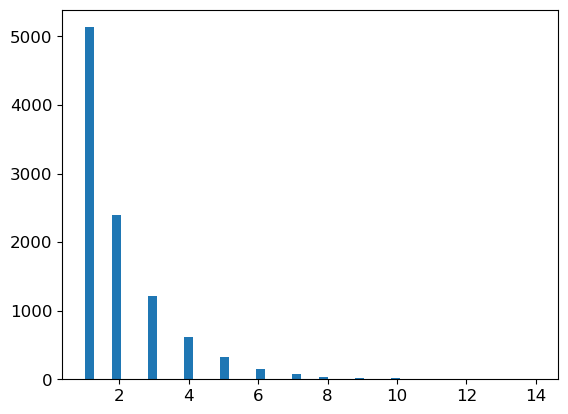

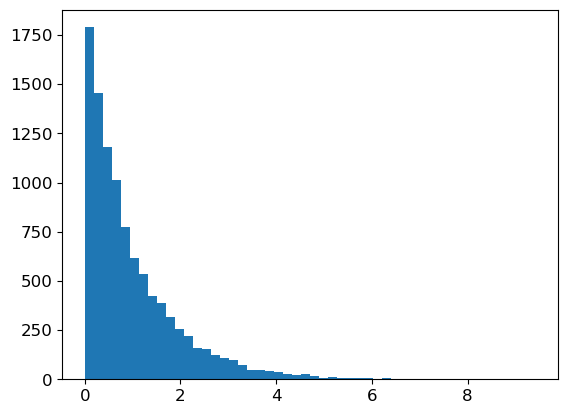

In [83]:
from scipy.stats import geom, expon
geom_distrib = geom(0.5).rvs(10000, random_state=2)
expon_distrib = expon(scale=1).rvs(10000, random_state=2)

plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [84]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [85]:
k=5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [86]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [87]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.30610953395107876, 'median_income'),
 (0.1606660275046793, 'INLAND'),
 (0.10636726332014639, 'pop_per_hhold'),
 (0.0784846336733595, 'longitude'),
 (0.07652756068390802, 'bedrooms_per_room')]

In [88]:
prep_feature_select_pl = Pipeline([
    ('preparation', full_pl),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [89]:
house_prep_top_k = prep_feature_select_pl.fit_transform(house_df, house_labels)

In [90]:
house_prep_top_k[0:3]

array([[0.14979757, 0.20748679, 0.0015048 , 0.08423488, 0.        ],
       [0.6082996 , 0.13901188, 0.00129646, 0.1017896 , 0.        ],
       [0.19534413, 0.11271569, 0.00106929, 0.15586867, 0.        ]])

In [91]:
house_prep[0:3, top_k_feature_indices]

array([[0.14979757, 0.20748679, 0.0015048 , 0.08423488, 0.        ],
       [0.6082996 , 0.13901188, 0.00129646, 0.1017896 , 0.        ],
       [0.19534413, 0.11271569, 0.00106929, 0.15586867, 0.        ]])

In [92]:
prep_select_and_predict_pl = Pipeline([
    ('preparation', full_pl),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('forest_reg', RandomForestRegressor(**rnd_search.best_params_)),
])

In [93]:
prep_select_and_predict_pl.fit(house_df, house_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attrib_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([7.84846337e-02, 6.73814228e-02, 4.20655038e-02, 1.75849056e-02,
       1.65025595e-02, 1.73172288e-02, 1.61577633e-02, 3.06109534e-01,
       6.90727635e-02, 1.06367263e-01, 7.65275607e-02, 1.48685971e-02,
       1.60666028e-01, 2.41992782e-04, 4.39597097e-03, 6.25627286e-03]),
                                    k=5)),
                ('forest_reg',
                 RandomForestRegressor(max_features=6, n_estimators=168))])

In [94]:
print("Predictions:\t", prep_select_and_predict_pl.predict(sample))
print("Labels:\t\t", list(sample_lb))

Predictions:	 [193252.97619048 167915.47619048 369524.5        127945.23809524
  56012.5       ]
Labels:		 [187800.0, 136600.0, 400000.0, 106300.0, 43500.0]


In [95]:
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19328,-122.87,38.48,27.0,3894.0,776.0,1832.0,715.0,3.5085,<1H OCEAN
4806,-118.34,34.02,49.0,1609.0,371.0,896.0,389.0,2.5156,<1H OCEAN
15645,-122.42,37.79,52.0,3364.0,1100.0,2112.0,1045.0,2.1343,NEAR BAY
2975,-119.08,35.32,8.0,11609.0,2141.0,5696.0,2100.0,5.0012,INLAND
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,INLAND


In [125]:
# Save the trained model to a folder
joblib.dump( prep_select_and_predict_pl, "C:/Users/chonl/OneDrive/Documents/GitHub/House price predictor/ML models/rndf_hypertuned_price_model.pkl")

['C:/Users/chonl/OneDrive/Documents/GitHub/House price predictor/rndf_hypertuned_price_model.pkl']

In [118]:
full_pl.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prep_select_and_predict_pl, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(house_df, house_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   4.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   4.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   4.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   4.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  16.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  17.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  17.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  17.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  17.4s
[CV] END feat

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  17.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  17.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  17.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  17.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  20.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.5s
[CV] END feat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attrib_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('minmax_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       5.07266073e-02, 1.08817038e-01, 6.29726246e-02, 7.23688071e-03,
       1.41978910e-01, 3.76627856e-04, 1.89340708e-03, 3.79666186e-03]),
                                                           k=5)),
                                       ('forest_reg',
                                        RandomForestRegressor(max_features=6,
                                                              n_estimators=168))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [119]:
grid_search_prep.best_params_

{'feature_selection__k': 16,
 'preparation__num__imputer__strategy': 'most_frequent'}